<a href="https://colab.research.google.com/github/ayoub-ait-idir/Internship-at-OCP/blob/main/Stage_ocp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les Packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

# Importer la base de données
Créer 4 DataFrame pour les 4 processus

In [ ]:
# Lire les bases de données
df_A = pd.read_csv('/content/drive/MyDrive/OCP/Données oksalab/oksaLabData_A.csv')
df_B = pd.read_csv('/content/drive/MyDrive/OCP/Données oksalab/oksaLabData_B.csv')
df_D = pd.read_csv('/content/drive/MyDrive/OCP/Données oksalab/oksaLabData_D.csv')
df_F = pd.read_csv('/content/drive/MyDrive/OCP/Données oksalab/oksaLabData_F.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Supprimer les colonnes non nécessaires
df_A = df_A.drop(df_A.columns[[0, 2, 4, 5]], axis = 1)
df_B = df_B.drop(df_B.columns[[0, 2, 4, 5]], axis = 1)
df_D = df_D.drop(df_D.columns[[0, 2, 4, 5]], axis = 1)
df_F = df_F.drop(df_F.columns[[0, 2, 4, 5]], axis = 1)

In [ ]:
df_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   jour                     28152 non-null  object 
 1   shift                    28152 non-null  float64
 2   temp_Amoyen              4736 non-null   float64
 3   temp_Afaible             9409 non-null   float64
 4   temp_AFort               4661 non-null   float64
 5   Densité Moyen            4736 non-null   float64
 6   Densité Faible           9409 non-null   float64
 7   Densité Filtrat          22077 non-null  float64
 8   Température Bouillie °C  22078 non-null  float64
 9   Température Filtrat °C   22069 non-null  float64
 10  Densité Bouillie         22077 non-null  float64
 11  Sulfate Libre (%H2SO4)   21929 non-null  float64
 12  Densité Fort             4660 non-null   float64
dtypes: float64(12), object(1)
memory usage: 104.0+ MB


In [ ]:
# Changer l'appelation des colonnes
colonnes = ['date','shift','dst_moy','dst_fbl','d2_dst_filt','d2_temp_boui',
            'd2_sulf_lib','d2_dst_boui','c4_dst_filt','c4_temp_boui','c4_dst_boui',
            'c4_sulf_lib', 'dst_eau-gyps','temp_eau_gyps','dst_fort','c1_dst_filt',
            'c1_temp_boui','c1_dst_boui','c1_sulf_lib']

colonnes_F =  ['date','shift','tempA_moy','tempA_fai','tempA_for','dst_moy',
               'dst_fai','dst_filt','temp_boui','temp_filt','dst_boui','sulf_lib',
               'dst_fort']

df_A.columns = colonnes
df_B.columns = colonnes
df_D.columns = colonnes
df_F.columns = colonnes_F

In [ ]:
df_A.head(1)

,date,shift,dst_moy,dst_fbl,d2_dst_filt,d2_temp_boui,d2_sulf_lib,d2_dst_boui,c4_dst_filt,c4_temp_boui,c4_dst_boui,c4_sulf_lib,dst_eau-gyps,temp_eau_gyps,dst_fort,c1_dst_filt,c1_temp_boui,c1_dst_boui,c1_sulf_lib
0,1/1/2018,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Traiter les données non numériques en remplaçant avec NaN
df_A.iloc[:, 1:] = df_A.iloc[:, 1:].apply(pd.to_numeric, args=('coerce',))
df_B.iloc[:, 1:] = df_B.iloc[:, 1:].apply(pd.to_numeric, args=('coerce',))
df_D.iloc[:, 1:] = df_D.iloc[:, 1:].apply(pd.to_numeric, args=('coerce',))
df_F.iloc[:, 1:] = df_F.iloc[:, 1:].apply(pd.to_numeric, args=('coerce',))

In [ ]:
df_F.head(2)

,date,shift,tempA_moy,tempA_fai,tempA_for,dst_moy,dst_fai,dst_filt,temp_boui,temp_filt,dst_boui,sulf_lib,dst_fort
0,1/1/2018,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2018,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Supprimer les lignes dont la date n'est pas donnée
df_A = df_A[df_A.date.notna()]
df_B = df_B[df_B.date.notna()]
df_D = df_D[df_D.date.notna()]
df_F = df_F[df_F.date.notna()]

In [ ]:
# Changer le type de la colonne jour en format date
df_A['date'] = pd.to_datetime(df_A.date)
df_B['date'] = pd.to_datetime(df_A.date)
df_D['date'] = pd.to_datetime(df_A.date)
df_F['date'] = pd.to_datetime(df_A.date)

In [ ]:
print(df_A.shape)
print(df_B.shape)
print(df_D.shape)
print(df_F.shape)

(28152, 19)
(28152, 19)
(28152, 19)
(28152, 13)


# Données non nécessaires (Repetitive Data, Duplicates..)

In [ ]:
# Supprimer les lignes dont toutes les colonnes sont NaN
df_A.dropna(subset=colonnes[2:], how='all', inplace=True)
df_B.dropna(subset=colonnes[2:], how='all', inplace=True)
df_D.dropna(subset=colonnes[2:], how='all', inplace=True)
df_F.dropna(subset=colonnes_F[2:], how='all', inplace=True)

In [ ]:
# Extraire les lignes dupliquées dans duplicate
duplicate_A = df_A[df_A.duplicated()]
duplicate_B = df_B[df_B.duplicated()]
duplicate_D = df_D[df_D.duplicated()]
duplicate_F = df_F[df_F.duplicated()]

print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_B)/len(df_B)*100)))
print('le pourcentage des lignes dupliquées = {} %'.format(round(len(duplicate_F)/len(df_F)*100)))

le pourcentage des lignes dupliquées = 0 %
le pourcentage des lignes dupliquées = 0 %


# Les Valeurs Manquantes 

**Processus A**

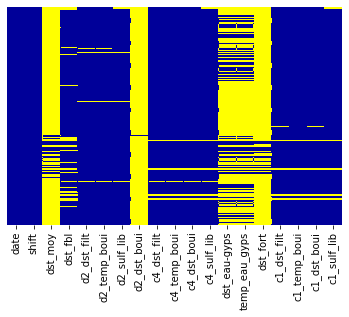

In [ ]:
# Tracer la Heatmap des valeurs manquantes 
colours = ['#000099', '#ffff00']
sns.heatmap(df_A.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [ ]:
# Le nombre de valeurs manquantes dans chaque colonne
"""
print('\nle nombre de valeurs manquantes dans chaque colonne: ')
print(df_A.isna().sum().sort_values(ascending=False))
"""
# Calculer les pourcentages des valeurs manquantes 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in df_A.columns:
  pct_missing = np.mean(df_A[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 20:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
dst_moy - 91.37%
d2_dst_boui - 99.74%
dst_eau-gyps - 67.1%
temp_eau_gyps - 67.07%
dst_fort - 93.8%


**Processus B**

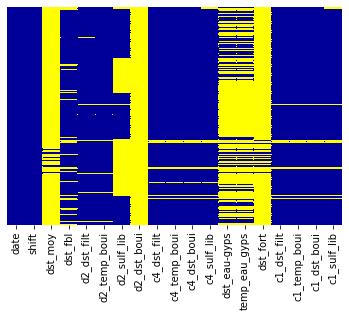

In [ ]:
# Tracer la Heatmap des valeurs manquantes 
colours = ['#000099', '#ffff00']
sns.heatmap(df_B.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [ ]:
# Le nombre de valeurs manquantes dans chaque colonne
"""
print('\nle nombre de valeurs manquantes dans chaque colonne: ')
print(df_A.isna().sum().sort_values(ascending=False))
"""
# Calculer les pourcentages des valeurs manquantes 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in df_B.columns:
  pct_missing = np.mean(df_B[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 20:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
dst_moy - 96.0%
d2_sulf_lib - 44.55%
d2_dst_boui - 99.67%
dst_eau-gyps - 66.47%
temp_eau_gyps - 66.47%
dst_fort - 92.73%


**Processus D**

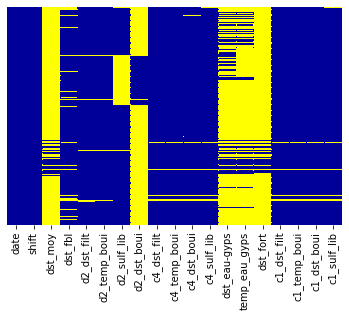

In [ ]:
# Tracer la Heatmap des valeurs manquantes 
colours = ['#000099', '#ffff00']
sns.heatmap(df_D.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [ ]:
# Le nombre de valeurs manquantes dans chaque colonne
"""
print('\nle nombre de valeurs manquantes dans chaque colonne: ')
print(df_A.isna().sum().sort_values(ascending=False))
"""
# Calculer les pourcentages des valeurs manquantes 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in df_D.columns:
  pct_missing = np.mean(df_D[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 20:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
dst_moy - 91.77%
d2_sulf_lib - 24.16%
d2_dst_boui - 78.24%
dst_eau-gyps - 75.92%
temp_eau_gyps - 82.39%
dst_fort - 93.09%


**Processus F**

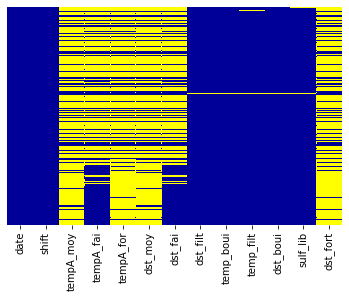

In [ ]:
# Tracer la Heatmap des valeurs manquantes 
colours = ['#000099', '#ffff00']
sns.heatmap(df_F.isna(), yticklabels=False, cbar=False, cmap=sns.color_palette(colours))

In [ ]:
# Le nombre de valeurs manquantes dans chaque colonne
"""
print('\nle nombre de valeurs manquantes dans chaque colonne: ')
print(df_A.isna().sum().sort_values(ascending=False))
"""
# Calculer les pourcentages des valeurs manquantes 
print('\nles pourcentages importants des valeurs manquantes: ')
#print(df.isna().sum()/len(df))
for col in df_F.columns:
  pct_missing = np.mean(df_F[col].isnull())
  rounded_pct = round(pct_missing*100, 2)
  if rounded_pct > 20:
    print('{} - {}%'.format(col, rounded_pct))


les pourcentages importants des valeurs manquantes: 
tempA_moy - 78.69%
tempA_fai - 57.67%
tempA_for - 79.03%
dst_moy - 78.69%
dst_fai - 57.67%
dst_fort - 79.03%


# Les valeurs Aberrantes

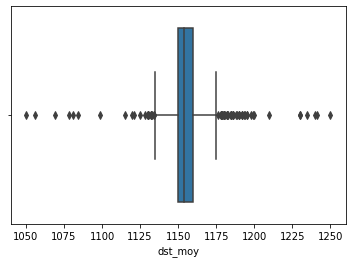

In [ ]:
sns.boxplot(data=df_A, x=df_A['dst_moy'])

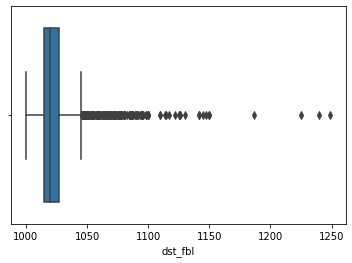

In [ ]:
sns.boxplot(data=df_A, x=df_A['dst_fbl'])

In [ ]:
# Fonction qui gère les valeurs abbérantes
# IQR: Interquartile Range

def handle_outliers(df):
  rows_to_drop = []
  for col in df.columns[1:]:
    print(type(df[col]))
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    l = len(df)
    for i in range(0, l):
      if (df.loc[df.index[i], col]>upper_whisker) | (df.loc[df.index[i], col]<lower_whisker):
        # Remplacer les outliers avec nan
        df.loc[df.index[i], col] = np.nan

In [ ]:
handle_outliers(df_A);
handle_outliers(df_B);
handle_outliers(df_D);
handle_outliers(df_F);

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

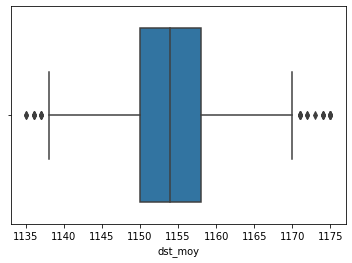

In [ ]:
sns.boxplot(data=df_A, x=df_A['dst_moy'])

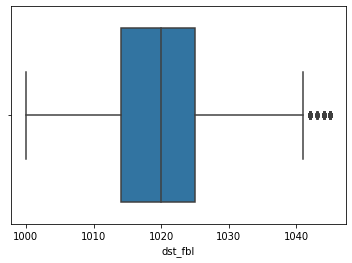

In [ ]:
sns.boxplot(data=df_A, x=df_A['dst_fbl'])

# Export Files

In [ ]:
# Uncommenter cette intruction pour installer le XlsWriter
#pip install XlsxWriter
'''
writer = pd.ExcelWriter('resultats_process.xlsx', engine='xlsxwriter')
df_A.to_excel(writer, sheet_name='A')
df_B.to_excel(writer, sheet_name='B')
df_D.to_excel(writer, sheet_name='D')
df_F.to_excel(writer, sheet_name='F')
writer.save()
'''

"\nwriter = pd.ExcelWriter('resultats_process.xlsx', engine='xlsxwriter')\ndf_A.to_excel(writer, sheet_name='A')\ndf_B.to_excel(writer, sheet_name='B')\ndf_D.to_excel(writer, sheet_name='D')\ndf_F.to_excel(writer, sheet_name='F')\nwriter.save()\n"

In [ ]:
'''
newA = pd.read_excel('/content/resultats_process.xlsx', sheet_name='A')
newA.info()
'''

"\nnewA = pd.read_excel('/content/resultats_process.xlsx', sheet_name='A')\nnewA.info()\n"

# Normalité

In [ ]:
# Kstest pour tester la Normalité
def test_normalite_1(df):
  # Numeric columns
  df_num = df.select_dtypes(include=np.number)
  df_cat = df.select_dtypes(exclude=[np.number])
  
  for col in df_num.columns:
    x = ~np.isnan(df[col])
    normed_col = (x - x.mean())/ x.std()
    d, p_value = stats.kstest(normed_col, 'norm')
    print(col, 'd={%e}, pval={%e}'%(round(d,3), p_value))

In [ ]:
# Normal test pour tester la normalité
def test_normalite_2(df):
  for col in df.columns[2:]:
    stat, p = stats.normaltest(df[col], axis=0, nan_policy='omit')
    print('statistics=%.3f, p=%.3f'%(stat, p))
    # interpretation
    alpha = 0.05
    if p > alpha:
      print('la distribution de ',col, ' est normale (Garder H0)')
    else:
      print('la distribution  de ',col,' apparait non gaussienne (Rejeter H0)')

**Process A**

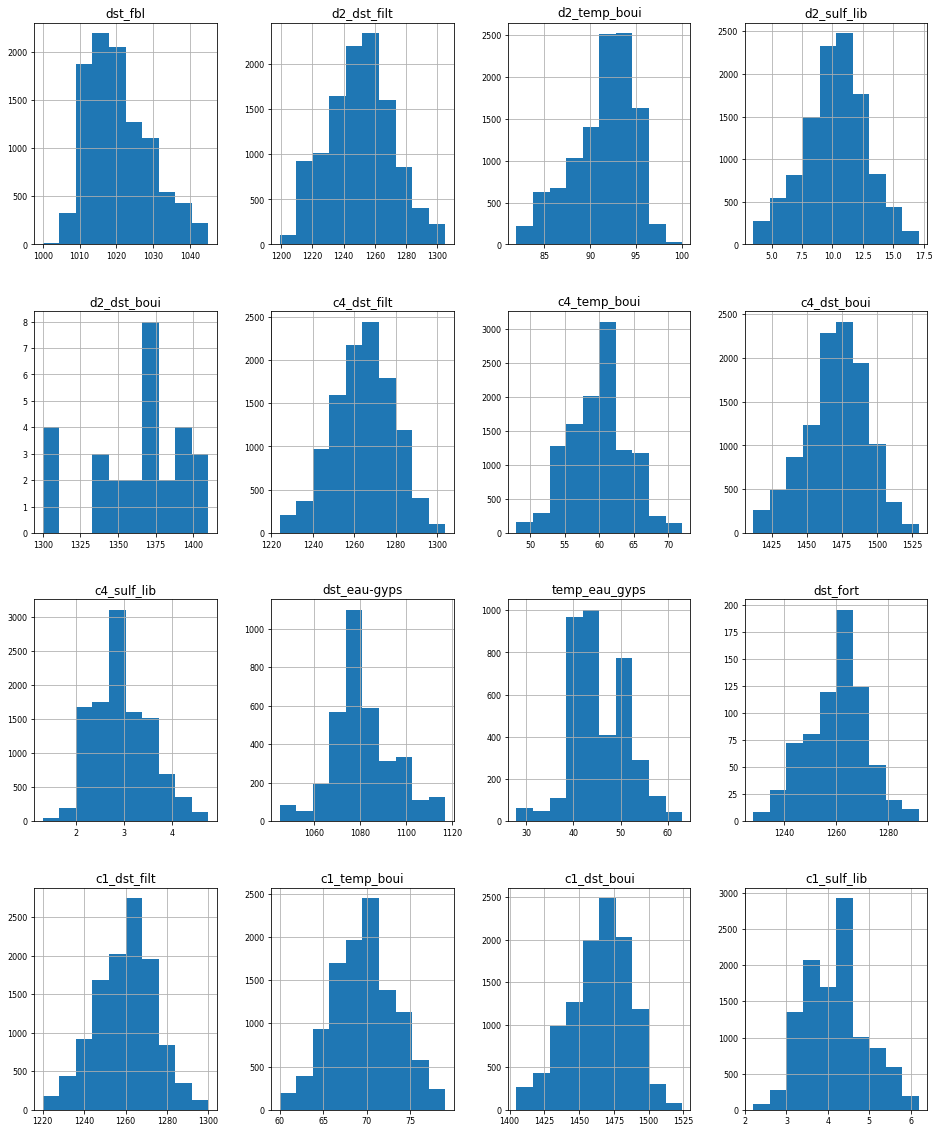

In [ ]:
# Histograme pour visualiser la distribution (Normalité)
df_A.iloc[:, 3:].hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
test_normalite_1(df_A.iloc[:, 3:])

dst_fbl d={5.150000e-01}, pval={0.000000e+00}
d2_dst_filt d={5.400000e-01}, pval={0.000000e+00}
d2_temp_boui d={5.370000e-01}, pval={0.000000e+00}
d2_sulf_lib d={5.410000e-01}, pval={0.000000e+00}
d2_dst_boui d={5.170000e-01}, pval={0.000000e+00}
c4_dst_filt d={5.410000e-01}, pval={0.000000e+00}
c4_temp_boui d={5.410000e-01}, pval={0.000000e+00}
c4_dst_boui d={5.390000e-01}, pval={0.000000e+00}
c4_sulf_lib d={5.400000e-01}, pval={0.000000e+00}
dst_eau-gyps d={4.460000e-01}, pval={0.000000e+00}
temp_eau_gyps d={4.300000e-01}, pval={0.000000e+00}
dst_fort d={5.400000e-01}, pval={0.000000e+00}
c1_dst_filt d={5.410000e-01}, pval={0.000000e+00}
c1_temp_boui d={5.390000e-01}, pval={0.000000e+00}
c1_dst_boui d={5.400000e-01}, pval={0.000000e+00}
c1_sulf_lib d={5.400000e-01}, pval={0.000000e+00}


In [ ]:
test_normalite_2(df_A)

statistics=3.362, p=0.186
la distribution de  dst_moy  est normale (Garder H0)
statistics=674.566, p=0.000
la distribution  de  dst_fbl  apparait non gaussienne (Rejeter H0)
statistics=45.180, p=0.000
la distribution  de  d2_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=582.206, p=0.000
la distribution  de  d2_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=38.799, p=0.000
la distribution  de  d2_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=2.461, p=0.292
la distribution de  d2_dst_boui  est normale (Garder H0)
statistics=97.333, p=0.000
la distribution  de  c4_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=21.622, p=0.000
la distribution  de  c4_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=190.984, p=0.000
la distribution  de  c4_dst_boui  apparait non gaussienne (Rejeter H0)
statistics=279.291, p=0.000
la distribution  de  c4_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=47.513, p=0.000
la distribution  de  dst_

**Process B**

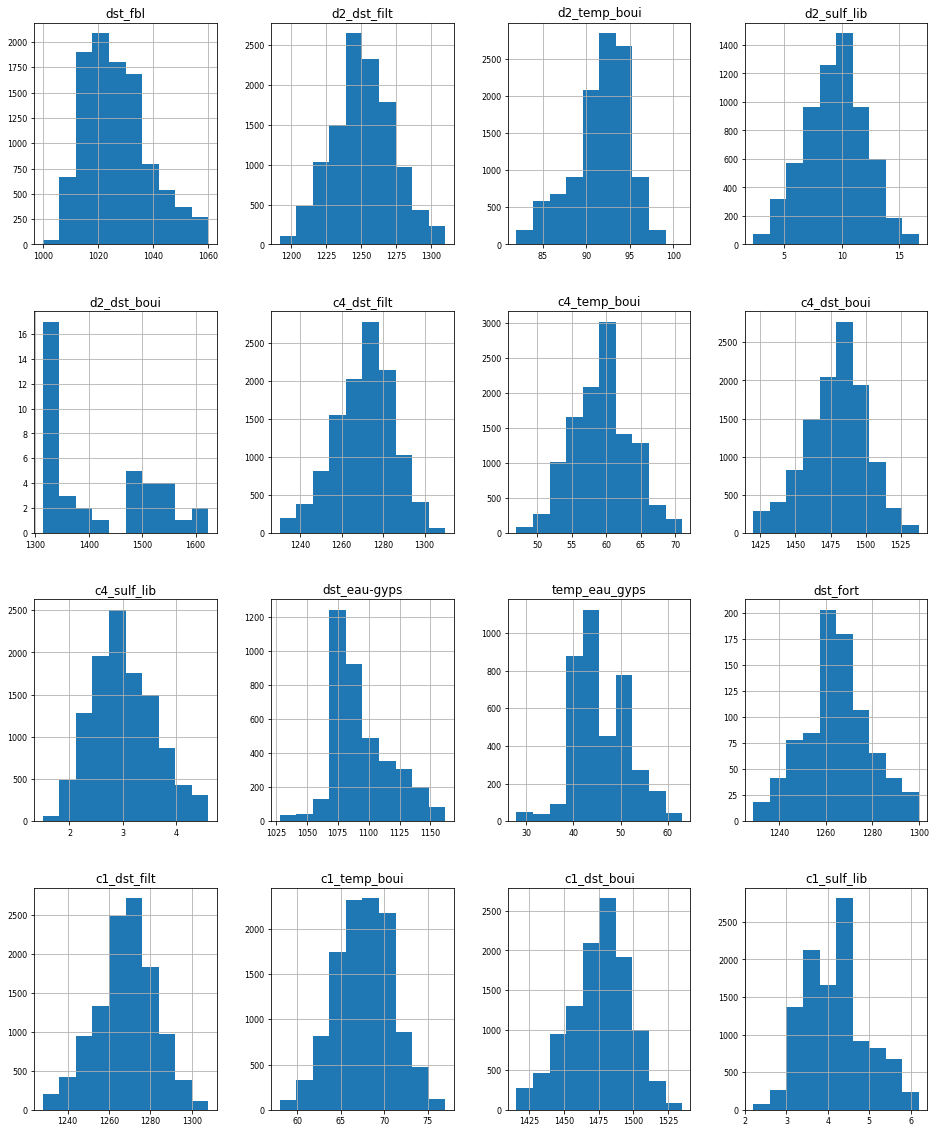

In [ ]:
# Histograme pour visualiser la distribution (Normalité)
df_B.iloc[:, 3:].hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
test_normalite_1(df_B.iloc[:, 3:])

dst_fbl d={5.150000e-01}, pval={0.000000e+00}
d2_dst_filt d={5.400000e-01}, pval={0.000000e+00}
d2_temp_boui d={5.390000e-01}, pval={0.000000e+00}
d2_sulf_lib d={3.660000e-01}, pval={0.000000e+00}
d2_dst_boui d={5.200000e-01}, pval={0.000000e+00}
c4_dst_filt d={5.410000e-01}, pval={0.000000e+00}
c4_temp_boui d={5.410000e-01}, pval={0.000000e+00}
c4_dst_boui d={5.390000e-01}, pval={0.000000e+00}
c4_sulf_lib d={5.400000e-01}, pval={0.000000e+00}
dst_eau-gyps d={4.330000e-01}, pval={0.000000e+00}
temp_eau_gyps d={4.300000e-01}, pval={0.000000e+00}
dst_fort d={5.380000e-01}, pval={0.000000e+00}
c1_dst_filt d={5.410000e-01}, pval={0.000000e+00}
c1_temp_boui d={5.410000e-01}, pval={0.000000e+00}
c1_dst_boui d={5.390000e-01}, pval={0.000000e+00}
c1_sulf_lib d={5.370000e-01}, pval={0.000000e+00}


In [ ]:
'''Probleme avec d2_dst_boui y'a une valeur ~100% manquantes'''
test_normalite_2(df_B)

statistics=1.003, p=0.606
la distribution de  dst_moy  est normale (Garder H0)
statistics=702.693, p=0.000
la distribution  de  dst_fbl  apparait non gaussienne (Rejeter H0)
statistics=60.675, p=0.000
la distribution  de  d2_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=660.935, p=0.000
la distribution  de  d2_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=27.387, p=0.000
la distribution  de  d2_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=9.823, p=0.007
la distribution  de  d2_dst_boui  apparait non gaussienne (Rejeter H0)
statistics=133.388, p=0.000
la distribution  de  c4_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=35.252, p=0.000
la distribution  de  c4_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=143.949, p=0.000
la distribution  de  c4_dst_boui  apparait non gaussienne (Rejeter H0)
statistics=243.349, p=0.000
la distribution  de  c4_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=239.804, p=0.000
la distri

**Process D**

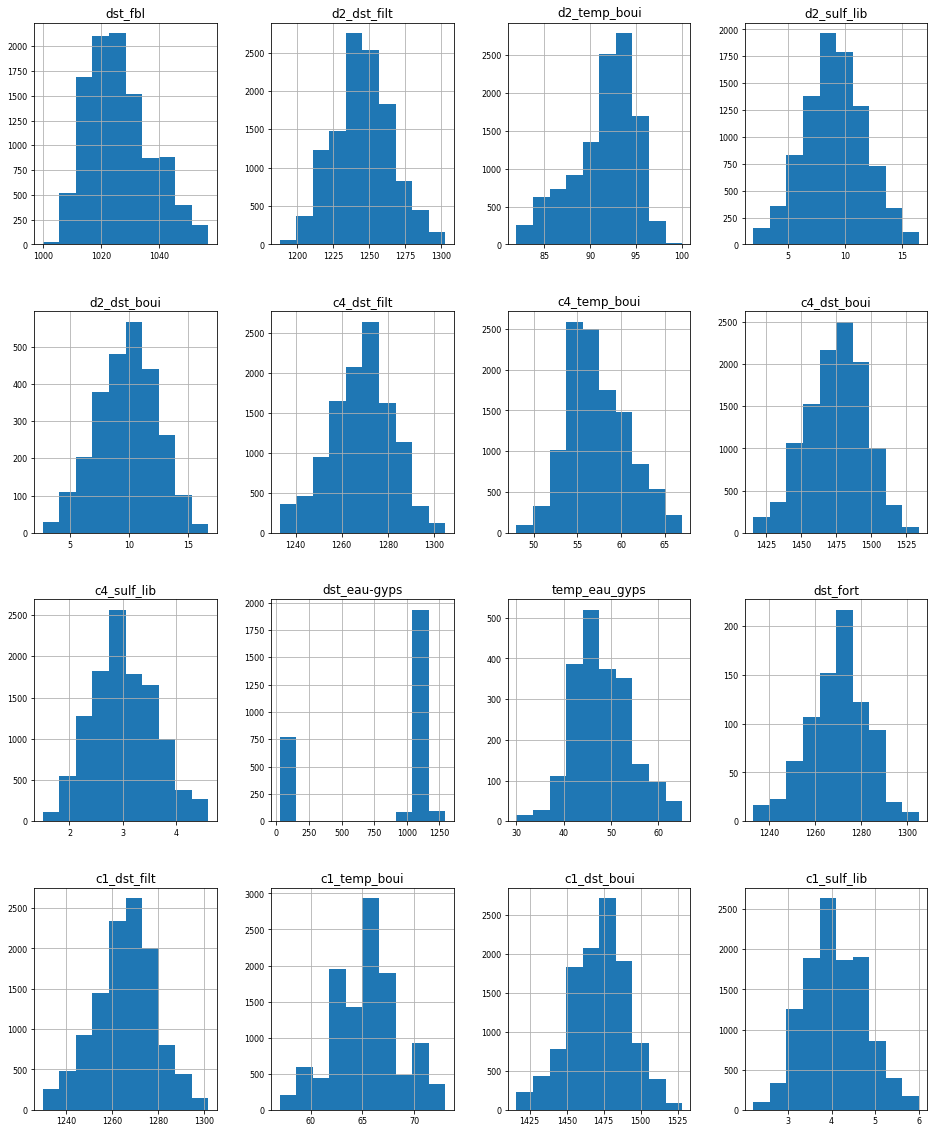

In [ ]:
# Histograme pour visualiser la distribution (Normalité)
df_D.iloc[:, 3:].hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
test_normalite_1(df_D.iloc[:, 3:])

dst_fbl d={5.170000e-01}, pval={0.000000e+00}
d2_dst_filt d={5.390000e-01}, pval={0.000000e+00}
d2_temp_boui d={5.390000e-01}, pval={0.000000e+00}
d2_sulf_lib d={4.670000e-01}, pval={0.000000e+00}
d2_dst_boui d={4.840000e-01}, pval={0.000000e+00}
c4_dst_filt d={5.400000e-01}, pval={0.000000e+00}
c4_temp_boui d={5.400000e-01}, pval={0.000000e+00}
c4_dst_boui d={5.390000e-01}, pval={0.000000e+00}
c4_sulf_lib d={5.410000e-01}, pval={0.000000e+00}
dst_eau-gyps d={4.730000e-01}, pval={0.000000e+00}
temp_eau_gyps d={5.030000e-01}, pval={0.000000e+00}
dst_fort d={5.380000e-01}, pval={0.000000e+00}
c1_dst_filt d={5.410000e-01}, pval={0.000000e+00}
c1_temp_boui d={5.390000e-01}, pval={0.000000e+00}
c1_dst_boui d={5.400000e-01}, pval={0.000000e+00}
c1_sulf_lib d={5.410000e-01}, pval={0.000000e+00}


In [ ]:
'''Probleme avec d2_dst_boui y'a une valeur ~100% manquantes'''
test_normalite_2(df_D)

statistics=2.314, p=0.314
la distribution de  dst_moy  est normale (Garder H0)
statistics=566.321, p=0.000
la distribution  de  dst_fbl  apparait non gaussienne (Rejeter H0)
statistics=23.803, p=0.000
la distribution  de  d2_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=700.211, p=0.000
la distribution  de  d2_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=29.294, p=0.000
la distribution  de  d2_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=34.011, p=0.000
la distribution  de  d2_dst_boui  apparait non gaussienne (Rejeter H0)
statistics=127.580, p=0.000
la distribution  de  c4_dst_filt  apparait non gaussienne (Rejeter H0)
statistics=279.175, p=0.000
la distribution  de  c4_temp_boui  apparait non gaussienne (Rejeter H0)
statistics=113.490, p=0.000
la distribution  de  c4_dst_boui  apparait non gaussienne (Rejeter H0)
statistics=132.255, p=0.000
la distribution  de  c4_sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=762.039, p=0.000
la dist

**Process F**

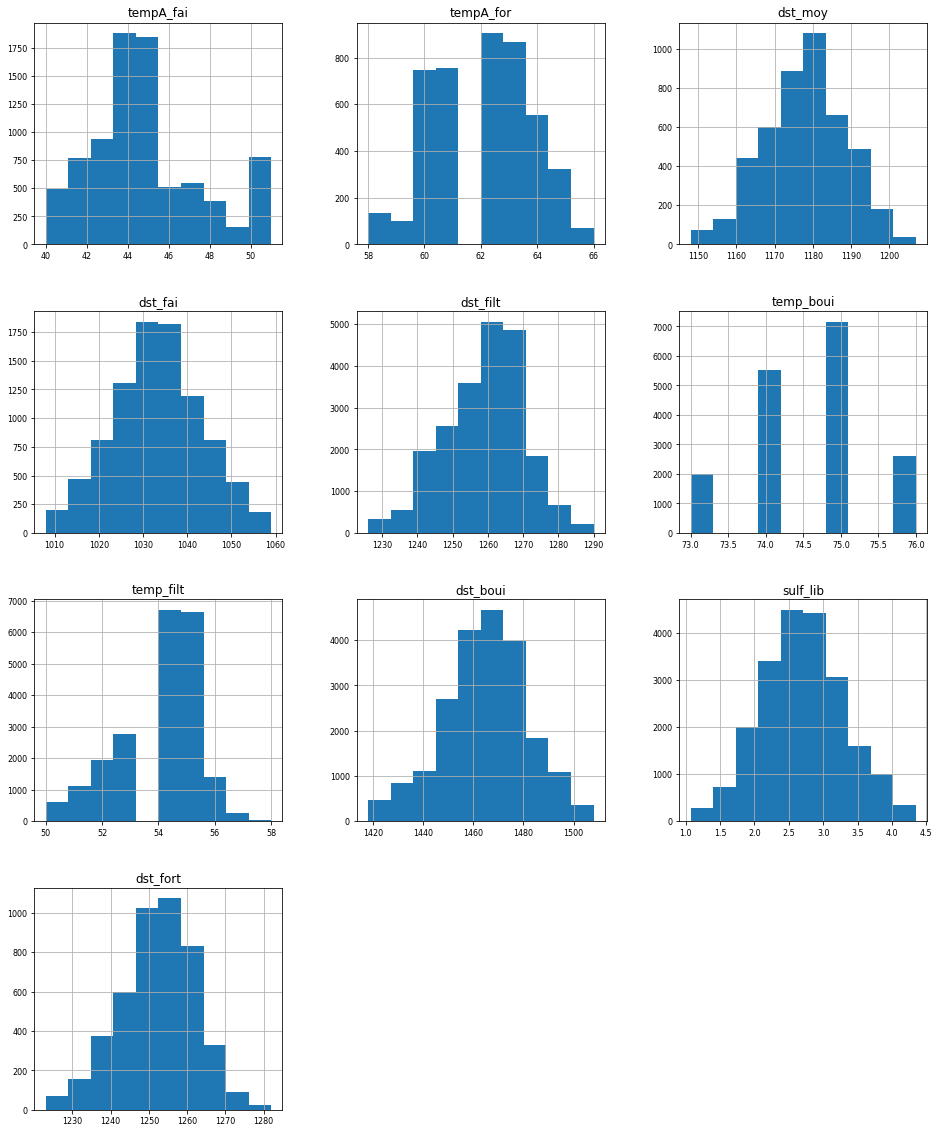

In [ ]:
# Histograme pour visualiser la distribution (Normalité)
df_F.iloc[:, 3:].hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
test_normalite_1(df_F.iloc[:, 3:])

tempA_fai d={4.060000e-01}, pval={0.000000e+00}
tempA_for d={4.910000e-01}, pval={0.000000e+00}
dst_moy d={4.890000e-01}, pval={0.000000e+00}
dst_fai d={3.880000e-01}, pval={0.000000e+00}
dst_filt d={5.380000e-01}, pval={0.000000e+00}
temp_boui d={4.810000e-01}, pval={0.000000e+00}
temp_filt d={5.400000e-01}, pval={0.000000e+00}
dst_boui d={5.410000e-01}, pval={0.000000e+00}
sulf_lib d={5.410000e-01}, pval={0.000000e+00}
dst_fort d={4.890000e-01}, pval={0.000000e+00}


In [ ]:
test_normalite_2(df_F)

statistics=65.114, p=0.000
la distribution  de  tempA_moy  apparait non gaussienne (Rejeter H0)
statistics=470.426, p=0.000
la distribution  de  tempA_fai  apparait non gaussienne (Rejeter H0)
statistics=77.392, p=0.000
la distribution  de  tempA_for  apparait non gaussienne (Rejeter H0)
statistics=17.789, p=0.000
la distribution  de  dst_moy  apparait non gaussienne (Rejeter H0)
statistics=54.438, p=0.000
la distribution  de  dst_fai  apparait non gaussienne (Rejeter H0)
statistics=224.223, p=0.000
la distribution  de  dst_filt  apparait non gaussienne (Rejeter H0)
statistics=851.262, p=0.000
la distribution  de  temp_boui  apparait non gaussienne (Rejeter H0)
statistics=1507.778, p=0.000
la distribution  de  temp_filt  apparait non gaussienne (Rejeter H0)
statistics=203.826, p=0.000
la distribution  de  dst_boui  apparait non gaussienne (Rejeter H0)
statistics=65.837, p=0.000
la distribution  de  sulf_lib  apparait non gaussienne (Rejeter H0)
statistics=55.193, p=0.000
la distributio

# Numeric Vs non Numeric Data

In [ ]:
# Process A
df_A_num = df_A.select_dtypes(include=np.number)
df_A_cat = df_A.select_dtypes(exclude=[np.number])
# Process B
df_B_num = df_B.select_dtypes(include=np.number)
df_B_cat = df_B.select_dtypes(exclude=[np.number])
# Process D
df_D_num = df_D.select_dtypes(include=np.number)
df_D_cat = df_D.select_dtypes(exclude=[np.number])
# Process F
df_F_num = df_F.select_dtypes(include=np.number)
df_F_cat = df_F.select_dtypes(exclude=[np.number])

# Resample Data

In [ ]:
# Resample data by month
resampled_A = df_A.resample('D', on='date').mean()
resampled_B = df_B.resample('D', on='date').mean()
resampled_D = df_D.resample('D', on='date').mean()
resampled_F = df_F.resample('D', on='date').mean()

In [ ]:
resampled_A.head()

,shift,dst_moy,dst_fbl,d2_dst_filt,d2_temp_boui,d2_sulf_lib,d2_dst_boui,c4_dst_filt,c4_temp_boui,c4_dst_boui,c4_sulf_lib,dst_eau-gyps,temp_eau_gyps,dst_fort,c1_dst_filt,c1_temp_boui,c1_dst_boui,c1_sulf_lib
date,,,,,,,,,,,,,,,,,,
2018-01-15,2.500000,NaN,NaN,1273.250000,91.875000,NaN,NaN,1277.125000,59.375000,1491.000000,NaN,NaN,NaN,NaN,1277.000000,69.875,1502.750000,NaN
2018-01-16,2.500000,NaN,NaN,1256.375000,89.875000,NaN,NaN,1270.500000,57.142857,1473.500000,NaN,NaN,NaN,NaN,1264.750000,67.375,1475.750000,NaN
2018-01-17,2.000000,NaN,NaN,1253.166667,87.545455,NaN,NaN,1265.333333,57.545455,1453.833333,NaN,NaN,NaN,NaN,1259.250000,66.000,1444.800000,NaN
2018-01-18,1.888889,NaN,NaN,1262.125000,88.375000,NaN,NaN,1256.000000,54.444444,1466.800000,NaN,NaN,NaN,NaN,1254.333333,66.375,1448.666667,NaN
2018-01-19,2.090909,NaN,NaN,1260.272727,89.909091,NaN,NaN,1283.125000,60.333333,1504.000000,NaN,NaN,NaN,NaN,1272.250000,69.625,1486.500000,NaN


# Tester la correlation

## Functions

In [ ]:
# Eliminer les colonnes avec les NaNs
def drop_na(df):
  for col in df.columns:
    if (df[col].isna().sum() != 0) :
      df = df.drop(col, axis='columns')
  return df

In [ ]:
# Fonction pour calculer et la matrice des p_value et la matrice des corrélations
def calculate_pvalues(df):
    #df_test = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    rho_pearson =  dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            rho_pearson[r][c] = round(pearsonr(df[r], df[c])[0],3)
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 3)
    return  rho_pearson, pvalues

In [ ]:
final_A = drop_na(resampled_A)
final_B = drop_na(resampled_B)
final_D = drop_na(resampled_D)
final_F = drop_na(resampled_F)

In [ ]:
# Trouver les resultats pour les differents Process
results_A = calculate_pvalues(final_A)
results_B = calculate_pvalues(final_B)
results_D = calculate_pvalues(final_D)
results_F = calculate_pvalues(final_F)

# Noter Bien
'''         !!! Pour utiliser pearsonr on doit éliminer les NaN sinon 
la méthode ne marche pas, si on essaie de les ignorer, des colonnes 
n'aurons pas la même longueur et la méthode ne marche pas
            !!! La méthode .corr() les ignores

De ce fait les coefficients de corrélations trouvés par les 2 méthodes
sont différents
'''
# Matrice de Corrélation & Matrice des p_value
rho_A, pvl_A= results_A[0], results_A[1]

rho_B, pvl_B= results_B[0], results_B[1]

rho_D, pvl_D= results_D[0], results_D[1]

rho_F, pvl_F= results_F[0], results_F[1]

## Corrélation

### Scatter plots

#### Process A

In [ ]:
sns.pairplot(resampled_A.iloc[:, 1:])

In [ ]:
plt.plot(resampled_A['c1_dst_boui'], resampled_A['c4_dst_filt'], 'o', alpha=0.5 )
plt.show()

#### Process B

In [ ]:
#sns.pairplot(resampled_B.iloc[:, 1:])

In [ ]:
#plt.plot(resampled_B['c1_dst_boui'], resampled_B['c4_dst_filt'], 'o', alpha=0.5 )
#plt.show()

#### Process D

In [ ]:
#sns.pairplot(resampled_D.iloc[:, 1:])

In [ ]:
#plt.plot(resampled_D['dst_fort'], resampled_D['c4_dst_filt'], 'o', alpha=0.5 )
#plt.show()

#### Process F

In [ ]:
#sns.pairplot(resampled_F.iloc[:, 1:])

In [ ]:
#plt.plot(resampled_F['dst_fort'], resampled_F['c4_dst_filt'], 'o', alpha=0.5 )
#plt.show()

### Tests

#### Process A

In [ ]:
# Juste les colonnes dont pvalue<0.05 et corrélation>0.5
var1_A = []
var2_A = []
corr_A = []
pval_A = []

for r in rho_A.columns:
  for c in rho_A.columns:
    if pvl_A[r][c]<0.05 and rho_A.loc[r,c]>0.6 and rho_A.loc[r,c]!= 1:
       var1_A.append(r)
       var2_A.append(c)
       corr_A.append(round(rho_A.loc[r,c],3))
       pval_A.append(round(pvl_A[r][c],3))

In [ ]:
# Creér une table avec les corrélations et les p_value
ar = np.array([var1_A, var2_A, corr_A, pval_A])
corr_pval_A = pd.DataFrame({'var1': var1_A, 'var2': var2_A, 
                            'correlation': corr_A, 'p_value': pval_A},
                      index = [i for i in range (0,len(var1_A))])
corr_pval_A

In [ ]:
# Intervalle de Confiance
n = len(final_A) 
se = 1/np.sqrt(n-3)
alpha = 0.05

corr_pval_A['r_z'] = np.arctanh(corr_pval_A['correlation'])
z = stats.norm.ppf(1-alpha/2)
# Intervalle de confiance de Z
corr_pval_A['inf_z'] = corr_pval_A['r_z'] - z*se
corr_pval_A['sup_z'] = corr_pval_A['r_z'] + z*se
# Intervalle de confiance du r (coeff de corrélation)
corr_pval_A['b_inf'] = np.tanh(corr_pval_A['inf_z'])
corr_pval_A['b_sup'] = np.tanh(corr_pval_A['sup_z'])

corr_pval_A.drop(['r_z', 'inf_z','sup_z'], axis=1)

In [ ]:
corr_A = df_A_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr_A[(corr_A >= 0.7) | (corr_A <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Process B

In [ ]:
# Juste les colonnes dont pvalue<0.05 et corrélation>0.5
var1_B = []
var2_B = []
corr_B = []
pval_B = []

for r in rho_B.columns:
  for c in rho_B.columns:
    if pvl_B[r][c]<0.05 and rho_B.loc[r,c]>0.6 and rho_B.loc[r,c]!= 1:
       var1_B.append(r)
       var2_B.append(c)
       corr_B.append(round(rho_B.loc[r,c],3))
       pval_B.append(round(pvl_B[r][c],3))

In [ ]:
# Creér une table avec les corrélations et les p_value
ar = np.array([var1_B, var2_B, corr_B, pval_B])
corr_pval_B = pd.DataFrame({'var1': var1_B, 'var2': var2_B, 
                            'correlation': corr_B, 'p_value': pval_B},
                      index = [i for i in range (0,len(var1_B))])
corr_pval_B

In [ ]:
# Intervalle de Confiance
n = len(final_B) 
se = 1/np.sqrt(n-3)
alpha = 0.05

corr_pval_B['r_z'] = np.arctanh(corr_pval_B['correlation'])
z = stats.norm.ppf(1-alpha/2)
# Intervalle de confiance de Z
corr_pval_B['inf_z'] = corr_pval_B['r_z'] - z*se
corr_pval_B['sup_z'] = corr_pval_B['r_z'] + z*se
# Intervalle de confiance du r (coeff de corrélation)
corr_pval_B['b_inf'] = np.tanh(corr_pval_B['inf_z'])
corr_pval_B['b_sup'] = np.tanh(corr_pval_B['sup_z'])

corr_pval_B.drop(['r_z', 'inf_z','sup_z'], axis=1)

In [ ]:
corr_B = df_B_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr_B[(corr_B >= 0.7) | (corr_B <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Process D

In [ ]:
# Juste les colonnes dont pvalue<0.05 et corrélation>0.5
var1_D = []
var2_D = []
corr_D = []
pval_D = []

for r in rho_D.columns:
  for c in rho_D.columns:
    if pvl_D[r][c]<0.05 and rho_D.loc[r,c]>0.6 and rho_D.loc[r,c]!= 1:
       var1_D.append(r)
       var2_D.append(c)
       corr_D.append(round(rho_D.loc[r,c],3))
       pval_D.append(round(pvl_D[r][c],3))

In [ ]:
# Creér une table avec les corrélations et les p_value
ar = np.array([var1_D, var2_D, corr_D, pval_D])
corr_pval_D = pd.DataFrame({'var1': var1_D, 'var2': var2_D, 
                            'correlation': corr_D, 'p_value': pval_D},
                      index = [i for i in range (0,len(var1_D))])
corr_pval_D

In [ ]:
# Intervalle de Confiance
n = len(final_D) 
se = 1/np.sqrt(n-3)
alpha = 0.05

corr_pval_D['r_z'] = np.arctanh(corr_pval_D['correlation'])
z = stats.norm.ppf(1-alpha/2)
# Intervalle de confiance de Z
corr_pval_D['inf_z'] = corr_pval_D['r_z'] - z*se
corr_pval_D['sup_z'] = corr_pval_D['r_z'] + z*se
# Intervalle de confiance du r (coeff de corrélation)
corr_pval_D['b_inf'] = np.tanh(corr_pval_D['inf_z'])
corr_pval_D['b_sup'] = np.tanh(corr_pval_D['sup_z'])

corr_pval_D.drop(['r_z', 'inf_z','sup_z'], axis=1)

In [ ]:
corr_D = df_D_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr_D[(corr_D >= 0.7) | (corr_D <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Process F

In [ ]:
# Juste les colonnes dont pvalue<0.05 et corrélation>0.5
var1_F = []
var2_F = []
corr_F = []
pval_F = []

for r in rho_F.columns:
  for c in rho_F.columns:
    if pvl_F[r][c]<0.05 and rho_F.loc[r,c]>0.6 and rho_F.loc[r,c]!= 1:
       var1_F.append(r)
       var2_F.append(c)
       corr_F.append(round(rho_F.loc[r,c],3))
       pval_F.append(round(pvl_F[r][c],3))

In [ ]:
# Creér une table avec les corrélations et les p_value
ar = np.array([var1_F, var2_F, corr_F, pval_F])
corr_pval_F = pd.DataFrame({'var1': var1_F, 'var2': var2_F, 
                            'correlation': corr_F, 'p_value': pval_F},
                      index = [i for i in range (0,len(var1_F))])
corr_pval_F

In [ ]:
# Intervalle de Confiance
n = len(final_F) 
se = 1/np.sqrt(n-3)
alpha = 0.05

corr_pval_F['r_z'] = np.arctanh(corr_pval_F['correlation'])
z = stats.norm.ppf(1-alpha/2)
# Intervalle de confiance de Z
corr_pval_F['inf_z'] = corr_pval_F['r_z'] - z*se
corr_pval_F['sup_z'] = corr_pval_F['r_z'] + z*se
# Intervalle de confiance du r (coeff de corrélation)
corr_pval_F['b_inf'] = np.tanh(corr_pval_F['inf_z'])
corr_pval_F['b_sup'] = np.tanh(corr_pval_F['sup_z'])

corr_pval_F.drop(['r_z', 'inf_z','sup_z'], axis=1)

In [ ]:
corr_F = df_F_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr_F[(corr_F >= 0.7) | (corr_F <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Merge Data

In [ ]:
# Read the ACP30 dataset & change columns' names
acp30 = pd.read_excel('/content/drive/MyDrive/OCP/data_ACP30.xlsx')
acp30.drop(columns=['DATE_MARCHE'], inplace=True)
acp30.drop(columns=['Date_enreg'], inplace=True)

cols = ['date','process','p2o5_se','p2o5_syn','p2o5_ina','ec',
        'pm_60c','cao','p2o5_acp30','densite_acp30','h2so4al_acp30', 
        'ts_acp30', 'as/p2o5']
acp30.columns = cols;

acp30.head()

In [ ]:
# Split Data By process & Set index to date column
# Process A
acp30_A = acp30[acp30['process']=='A']
acp30_A = acp30_A.drop('process', axis='columns')
acp30_A.set_index('date', inplace=True)
# Process B
acp30_B = acp30[acp30['process']=='B']
acp30_B = acp30_B.drop('process', axis='columns')
acp30_B.set_index('date', inplace=True)
# Process D
acp30_D = acp30[acp30['process']=='D']
acp30_D = acp30_D.drop('process', axis='columns')
acp30_D.set_index('date', inplace=True)
# Process F
acp30_F = acp30[acp30['process']=='F']
acp30_F = acp30_F.drop('process', axis='columns')
acp30_F.set_index('date', inplace=True)

In [ ]:
# Merge Data of Process A with acp30_A by index
merged_A = resampled_A.merge(acp30_A, left_index=True, right_index=True)
merged_A.head()

In [ ]:
# Merge Data of Process B with acp30_A by index
merged_B = resampled_B.merge(acp30_B, left_index=True, right_index=True)
merged_B.head()

In [ ]:
# Merge Data of Process D with acp30_A by index
merged_D = resampled_D.merge(acp30_D, left_index=True, right_index=True)
merged_D.head()

In [ ]:
# Merge Data of Process F with acp30_A by index
merged_F = resampled_F.merge(acp30_F, left_index=True, right_index=True)
merged_F.head()

# Correlation

In [ ]:
import scipy.stats
scipy.stats.pearsonr()